# Trabalho prático 1

## Exercício 1

In [385]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as clr
import numpy as np

In [386]:
img1 = Image.open('./imagens/peppers.bmp')
img1 = img1.convert('RGB')
img1.save('./imagens/peppers_compressed_ultra_high.jpg', quality=100)
img1.save('./imagens/peppers_compressed_high.jpg', quality=75)
img1.save('./imagens/peppers_compressed_medium.jpg', quality=50)
img1.save('./imagens/peppers_compressed_low.jpg', quality=25)

img2 = Image.open('./imagens/logo.bmp')
img2 = img2.convert('RGB')
img2.save('./imagens/logo_compressed_ultra_high.jpg', quality=100)
img2.save('./imagens/logo_compressed_high.jpg', quality=75)
img2.save('./imagens/logo_compressed_medium.jpg', quality=50)
img2.save('./imagens/logo_compressed_low.jpg', quality=25)

img3 = Image.open('./imagens/barn_mountains.bmp')
img3 = img3.convert('RGB')
img3.save('./imagens/barn_mountains_compressed_ultra_high.jpg', quality=100)
img3.save('./imagens/barn_mountains_compressed_high.jpg', quality=75)
img3.save('./imagens/barn_mountains_compressed_medium.jpg', quality=50)
img3.save('./imagens/barn_mountains_compressed_low.jpg', quality=25)

In [387]:
def compress_graph(image_name):
    img = Image.open(f'./imagens/{image_name}').convert('RGB')
    quality = []
    size = []
    for i in range(100, -1, -1):
        img.save(f'./imagens/animations/{image_name}_{i}.jpg', quality=i)
        quality.append(i)
    
    for i in range(100, -1, -1):
        size.append(os.path.getsize(f'./imagens/animations/{image_name}_{i}.jpg')/1000)
    
    images = []

    for i in range(100, -1, -1):
        img = Image.open(f'./imagens/animations/{image_name}_{i}.jpg')
        images.append(img)

    images[0].save(f'./imagens/{image_name}.gif', save_all=True, append_images=images[1:], optimize=False, duration=2)

    plt.figure()
    plt.title(f'Relação entre qualidade e o tamanho da compressão JPG de: {image_name}')
    plt.plot(quality, size)
    plt.xlabel('Quality')
    plt.ylabel('Size (KB)')
    plt.show()

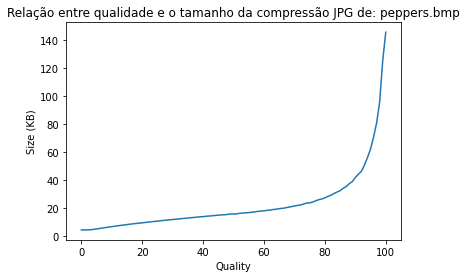

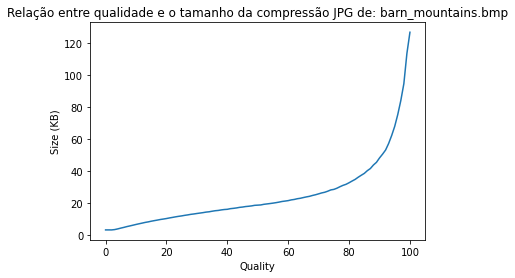

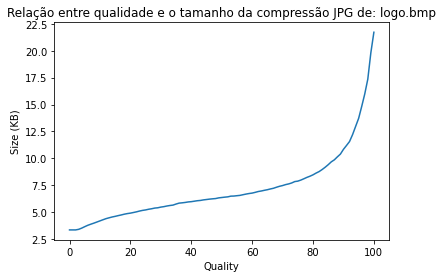

In [388]:
compress_graph('peppers.bmp')
compress_graph('barn_mountains.bmp')
compress_graph('logo.bmp')

### Resultados e Conclusões

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/logo.bmp' width=400 heigh=200/> |<img src='imagens/logo_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/logo_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/logo_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/logo_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/logo.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 |
| Size (KB) | 422KB | 22KB | 8KB| 7KB| 6KB | --- |
| Compression Rate | --- | 94.79% | 98,10% | 98.34% | 98,58% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/peppers.bmp' width=400 heigh=200/> |<img src='imagens/peppers_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/peppers_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/peppers_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/peppers_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/peppers.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 |
| Size (KB) | 577KB | 142KB |24KB | 16KB | 11KB| --- |
| Compression Rate | --- | 75.39% | 95,85% | 97,23% | 98,09% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/barn_mountains.bmp' width=400 heigh=200/> |<img src='imagens/barn_mountains_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/barn_mountains_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/barn_mountains_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/barn_mountains_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/barn_mountains.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 |
| Size (KB) | 349KB| 124KB | 28KB | 19KB | 12KB | --- |
| Compression Rate | --- | 64.47% | 91.98% | 94.56% | 96.56% | --- |

Perante os resultados obtidos, podemos concluir que, de um modo geral, as imagens com transições abruptas entre tonalidades apresentam uma maior distorção quando comprimidas. Podemos observar este efeito na imagem logo.bmp, que é o conjunto de duas formas geométricas que criam um alto contraste com o fundo. Na imagem peppers.bmp, existe uma maior distorção nas zonas de transição entre tonalidades contrastantes. Porém, também se nota uma pixelização entre tonalidades semelhantes com uma qualidade mais baixa

A imagem logo.bmp, mesmo com uma qualidade alta (75%), já apresenta uma leve distroção no contorno das figuras e, à medida que a qualidade diminui, esta distorção vai ficando ainda mais evidente. A razão pela qual podemos verificar ruído com uma qualidade de compressão alta, deve-se ao facto de existir um elevado contraste entre as tonalidades das formas e o fundo (só existem três cores com apenas uma tonalidade cada uma).

Na imagem peppers.bmp, apenas começa a ser visível 


## Exercício 2

In [389]:
def encoder(image):
    pass

In [390]:
def decoder(image):
    pass

## Exercício 3

In [391]:
## create colormap
def create_colormap(color_list):
    return clr.LinearSegmentedColormap.from_list('cmap', color_list, N=256)


In [392]:
def plot_image(image, colormap=create_colormap(['black', 'white']), title=""):
    plt.figure() 
    plt.title(title)
    plt.imshow(image, colormap)
    plt.axis('off')
    plt.show()

In [393]:
## read image
def read_image(image_name):
    image = np.array(plt.imread(image_name))
    return image


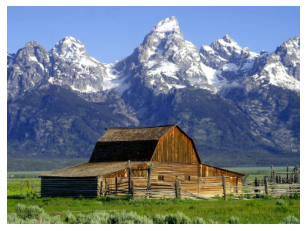

In [394]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image)


In [395]:
red_map = create_colormap(['black', 'red'])
green_map = create_colormap(['black', 'green'])
blue_map = create_colormap(['black', 'blue'])
random_map = create_colormap(['blue', 'orange', 'pink'])

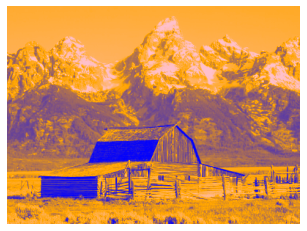

In [396]:
plot_image(image[:, :, 1], random_map)

In [397]:
def get_image_rgb(image):
    return np.array((image[:, :, 0], image[:, :, 1], image[:, :, 2]))

In [398]:
def get_image_from_rgb(rgb):
    lines, columns = rgb[0].shape
    img = np.zeros((lines, columns, 3), dtype=np.uint8)
    img[:, :, 0] = rgb[0]
    img[:, :, 1] = rgb[1]
    img[:, :, 2] = rgb[2]
    return img

(3, 297, 400)


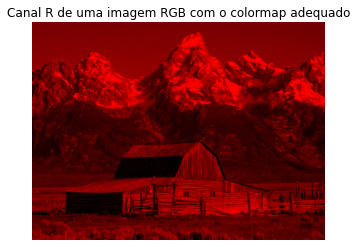

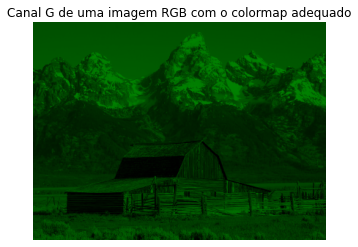

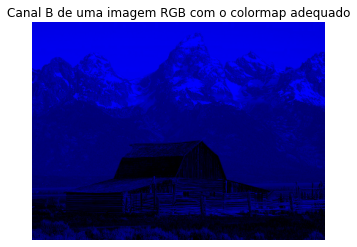

In [399]:
img_rgb = get_image_rgb(image)
print(img_rgb.shape)
plot_image(img_rgb[0], red_map, 'Canal R de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[1], green_map, 'Canal G de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[2], blue_map, 'Canal B de uma imagem RGB com o colormap adequado')

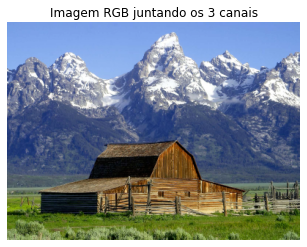

In [400]:
plot_image(get_image_from_rgb(img_rgb), title='Imagem RGB juntando os 3 canais')

# Exercicio 4

In [401]:
def add_padding(image):
    rows, columns, _ = image.shape
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]

    # add rows
    if rows % 16 != 0:
        rows_to_add = 16 - rows % 16

        aux_red = np.tile(red[-1, :], (rows_to_add, 1))
        aux_green = np.tile(green[-1, :], (rows_to_add, 1))
        aux_blue = np.tile(blue[-1, :], (rows_to_add, 1))

        red = np.vstack([red, aux_red])
        green = np.vstack([green, aux_green])
        blue = np.vstack([blue, aux_blue])
    
    # add columns
    if columns % 16 != 0:
        columns_to_add = 16 - columns % 16

        aux_red = np.tile(red[:, -1], (columns_to_add, 1))
        aux_green = np.tile(green[:, -1], (columns_to_add, 1))
        aux_blue = np.tile(blue[:, -1], (columns_to_add, 1))

        red = np.hstack([red, aux_red.T])
        green = np.hstack([green, aux_green.T])
        blue = np.hstack([blue, aux_blue.T])
    
    return get_image_from_rgb((red, green, blue))

Before:  (297, 400, 3)
After:  (304, 400, 3)


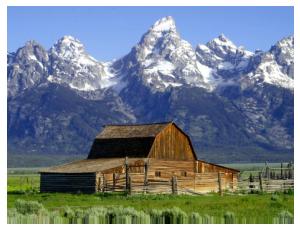

In [402]:
image = read_image('./imagens/barn_mountains.bmp')
print("Before: ", image.shape)
image = add_padding(image)
print("After: ", image.shape)
plot_image(image)

In [403]:
def revert_padding(image, original_rows, original_columns):
    rows, columns, _ = image.shape
    if rows < original_rows or columns < original_columns:
        return image
    
    return image[:original_rows, :original_columns, :]


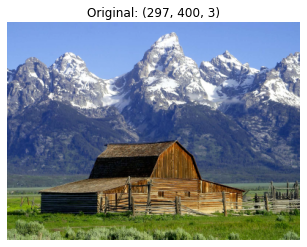

In [404]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image, title=f'Original: {image.shape}')
original_rows, original_columns, _ = image.shape

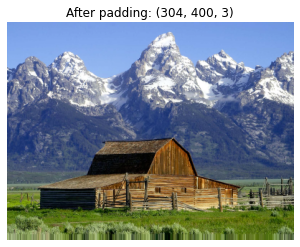

In [405]:
image = add_padding(image)
plot_image(image, title=f'After padding: {image.shape}')

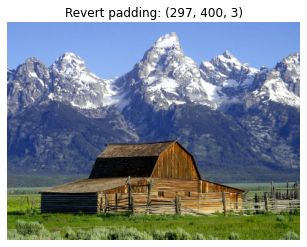

In [406]:
image = revert_padding(image, original_rows, original_columns)
plot_image(image, title=f'Revert padding: {image.shape}')

## Exercício 5

### Conversão para o modelo cor YCbCr

In [407]:
def convert_rgb_to_ycbcr(image):
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    aux = image.dot(ycbcr_matrix.T)
    aux[:, :, 1:3] += 128
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)

In [408]:
def convert_ycbcr_to_rgb(image):
    image = image.astype(np.float32)
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    inverse = np.linalg.inv(ycbcr_matrix.T)
    aux = np.copy(image)
    aux[:, :, 1:3] -= 128
    aux = aux.dot(inverse)
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)
    

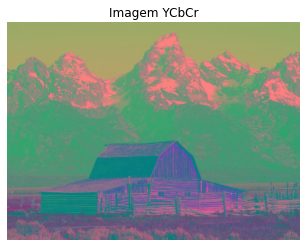

In [409]:
image = read_image('../imagens/barn_mountains.bmp')
first_pixel = image[0, 0]
image = convert_rgb_to_ycbcr(image)
plot_image(np.uint8(image), title='Imagem YCbCr')

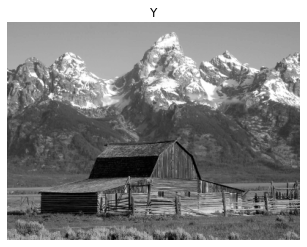

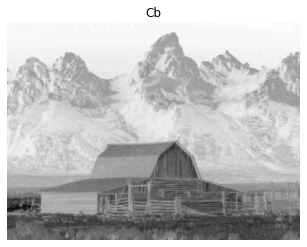

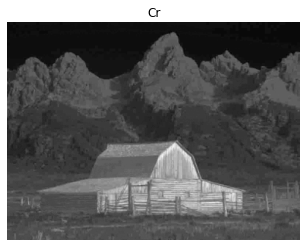

In [410]:
plot_image(image[:, :, 0], title='Y')

#plot_image(image[:, :, 1], create_colormap([(131/255, 145/255, 57/255), (130/255, 116/255, 203/255)]), 'Cb')
#plot_image(image[:, :, 2], create_colormap([(63/255, 134/255, 110/255), (170/255, 80/255, 111/255)]), 'Cr')

plot_image(image[:, :, 1], title='Cb')
plot_image(image[:, :, 2], title='Cr')

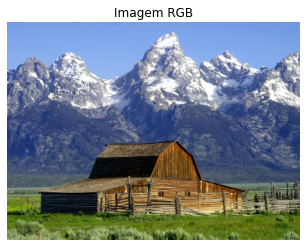

In [411]:
image = convert_ycbcr_to_rgb(image)
plot_image(image, title='Imagem RGB')